<a href="https://colab.research.google.com/github/Ssonamy/MADSU/blob/main/Lab%202.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная 2.1**

## **Импорт библиотек:**


Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prokshitha/home-value-insights")
# /kaggle/input/home-value-insights/house_price_regression_dataset.csv -- путь к датасету
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'home-value-insights' dataset.
Path to dataset files: /kaggle/input/home-value-insights


## **1. С помощью pandas загрузите датасет для предсказания цены дома. Выведите его размеры.**
Указание: Данные можно скачать тут: https://www.kaggle.com/datasets/prokshitha/home-value-insights

In [ ]:
data = pd.read_csv('/kaggle/input/home-value-insights/house_price_regression_dataset.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


Размеры:

In [ ]:
data.shape

(1000, 8)

***Построение 2D-графиков***

## **2. Постройте круговую диаграмму для признака Num_Bedrooms, иллюстрирующуто количество домов в процентах в зависимости от количества спален. СделаЙте сектор с наибольшим числом домов выдвинутым.**


Для признака Num_Bedrooms посмотрим возможное количество спален, а также соответсвующее им количество домов с таким количеством спален:

In [ ]:
data['Num_Bedrooms'].value_counts()

,count
Num_Bedrooms,
2,215
5,205
1,201
4,197
3,182


Из этой серии возьмем в качестве меток количество спальных комнат (стоблец index) в виде списка, а также массив с количеством домов с соответсвующим количеством спален:

In [ ]:
labels = data['Num_Bedrooms'].value_counts().index.to_list()
values = data['Num_Bedrooms'].value_counts().values

Построим круговую диаграмму, передав в неё эти значения, а также ууказав необходимые значения параметров

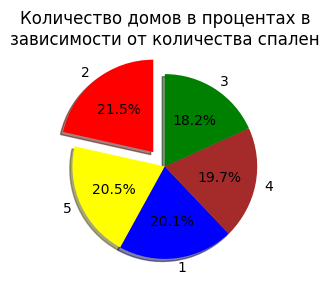

In [ ]:
plt.figure(figsize=(4,3))
plt.pie(values, shadow=True,autopct='%1.1f%%',labels=labels,explode=[0.2, 0, 0, 0, 0],startangle=90,radius=1,colors=['red','yellow','blue','brown','green'])
plt.title('Количество домов в процентах в\nзависимости от количества спален', fontsize=12, pad=5)
plt.show()

## **З. Постройте гистограмму по целевой переменной House Price. Оцените визуально, по какоЙ цене продаётся наибольшее количество домов.**


Построим гистограмму признака House_Price:


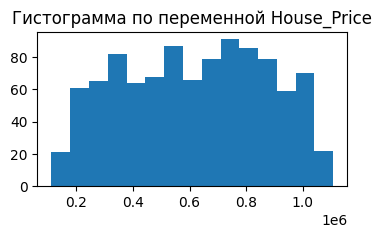

In [ ]:
f=plt.figure(figsize=(4,2))
plt.title('Гистограмма по переменной House_Price', fontsize=12)
plt.hist(data['House_Price'], bins=15)
plt.show()

Наибольшее количество домов продается по цене 0.75 миллионов.
Тот же график с помощью библиотеки seaborn:

<Axes: title={'center': 'Гистограмма по переменной House_Price'}, xlabel='House_Price', ylabel='Count'>

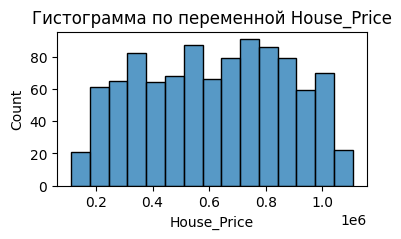

In [ ]:
f = plt.figure(figsize=(4,2))
plt.title('Гистограмма по переменной House_Price', fontsize = 12)
sns.histplot(data=data, x='House_Price', bins=15)


## **4. Постройте диаграммы рассеяния для признаков Square_Footage, Year_Built в зависимости от целевой переменной House_Price в одной области figure. Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.**



Построим диаграммы рассеивания для указанных признаков:


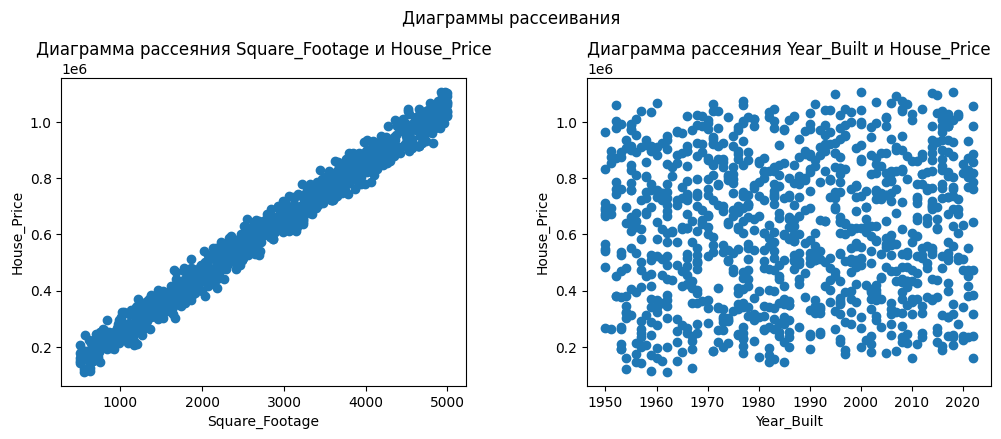

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,4)) # Можно сразу создать область и оси

ax[0].scatter(data['Square_Footage'], data['House_Price'])
ax[1].scatter(data['Year_Built'], data['House_Price'])

f.subplots_adjust(hspace=0.5, wspace=0.3) # Можно сразу задать расстояние между строками и столбцами соответственно

ax[0].set(title = "Диаграмма рассеяния Square_Footage и House_Price", xlabel='Square_Footage', ylabel='House_Price')
ax[1].set(title = 'Диаграмма рассеяния Year_Built и House_Price', xlabel='Year_Built', ylabel='House_Price')

plt.suptitle('Диаграммы рассеивания', y = 1.05, fontsize=12)
plt.show()

Тот же граффик с помощью библиотеки seaborn:

Text(0.5, 1.05, 'Диаграммы рассеивания')

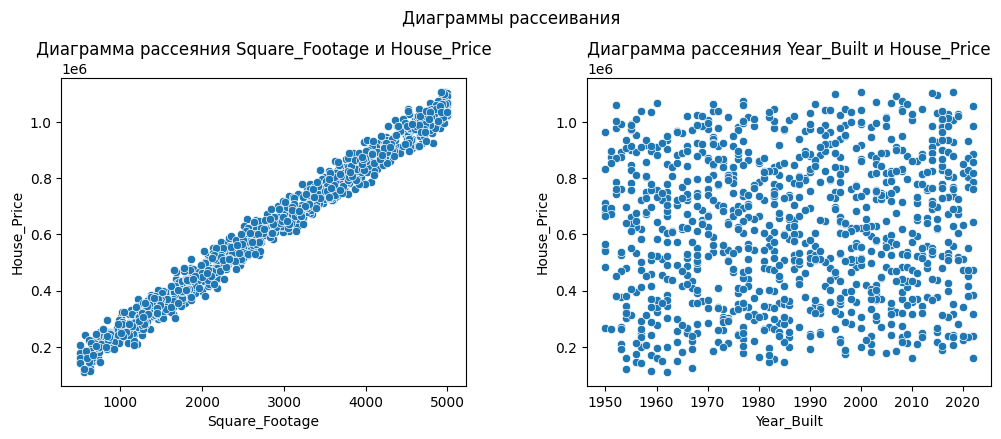

In [ ]:
f, ax =plt.subplots(1, 2, figsize=(12,4))
f.subplots_adjust(hspace=2, wspace=0.3)

sns.scatterplot(data=data, x='Square_Footage',  y='House_Price', ax=ax[0]).set(title='Диаграмма рассеяния Square_Footage и House_Price')
sns.scatterplot(data=data, x='Year_Built',      y='House_Price', ax=ax[1]).set(title='Диаграмма рассеяния Year_Built и House_Price')

plt.suptitle('Диаграммы рассеивания', fontsize=12, y=1.05)

Разброс точек на диаграмме рассеивания для признаков Square_Footage и House_Price напоминает линейную функцию


## **5. Постройте ядерную оценку плотности целевой переменной House_Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевоЙ переменноЙ House_Price и признака Num_Bathrooms, затем оцените визуально с каким количеством ванных комнат и по какоЙ цене продаётся основная масса домов.**


Построим одномерную ядерную оценку плотности:



<Axes: title={'center': 'Ядерная оценка плотности целевой переменной House_Price'}, xlabel='House_Price', ylabel='Density'>

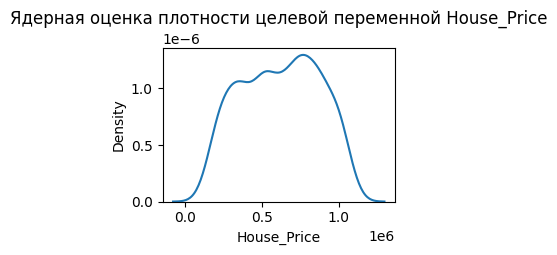

In [ ]:
f = plt.figure(figsize=(3, 2))
plt.title('Ядерная оценка плотности целевой переменной House_Price', fontsize=12, y=1.1)
sns.kdeplot(data=data, x='House_Price')

На нормальное распределение не очень похоже.

Построим двумерную ядерную оценку плотности:

<Axes: title={'center': 'Двумерная ядерная оценка плотности для целевой переменной\nHouse_Price и признака Num_Bathrooms'}, xlabel='House_Price', ylabel='Num_Bathrooms'>

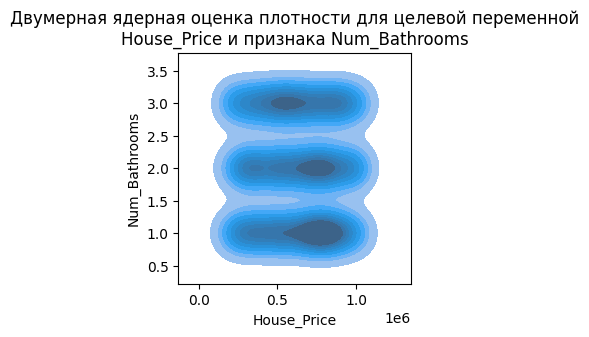

In [ ]:
f = plt.figure(figsize=(3,3))
plt.title('Двумерная ядерная оценка плотности для целевой переменной\nHouse_Price и признака Num_Bathrooms', fontsize=12)
sns.kdeplot(data=data, x='House_Price', y='Num_Bathrooms', fill=True)

Самое большое количество домов в датасете имеют одну ванную комнату и продаются примерно по цене от 0.6 до 0.9 миллионов.


## **6. Постройте ящиковую диаграмму признака Square_Footage. Оцените визуально имеются ли выбросы.**


Построим ящиковую диаграмму:



Text(0.5, 1.0, 'Ящиковая диаграмма признака Square_Footage')

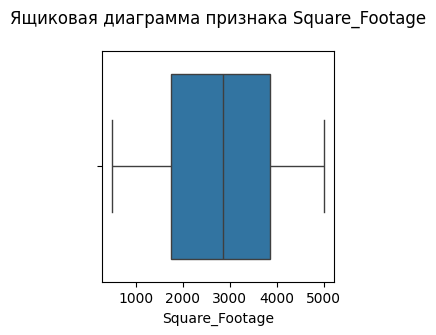

In [ ]:
f = plt.figure(figsize=(3,3))
sns.boxplot(data=data, x='Square_Footage')
plt.title('Ящиковая диаграмма признака Square_Footage', fontsize=12, pad=20)

Повернем график и зададим цвет:

Text(0.5, 1.0, 'Ящиковая диаграмма признака Square_Footage')

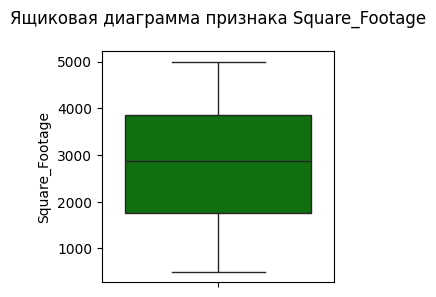

In [ ]:
f = plt.figure(figsize=(3, 3))
sns.boxplot(y='Square_Footage', data=data, orient='v', color='green')
plt.title('Ящиковая диаграмма признака Square_Footage', fontsize=12, pad=20)

Выбросами сичтаются значения вне "усов", в данном случае их нет.

## **7. При помощи сетки графиков PairGrid визуализируйте попарные отношения всех признаков следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния.**



Получим названия признаков в виде списка (возьмём не все признаки, т.к. картинка не поместится):


In [ ]:
col = data.columns[:-5].to_list()
col

['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms']

Построим сетку графиков с попарными отношениями

<Figure size 800x800 with 0 Axes>

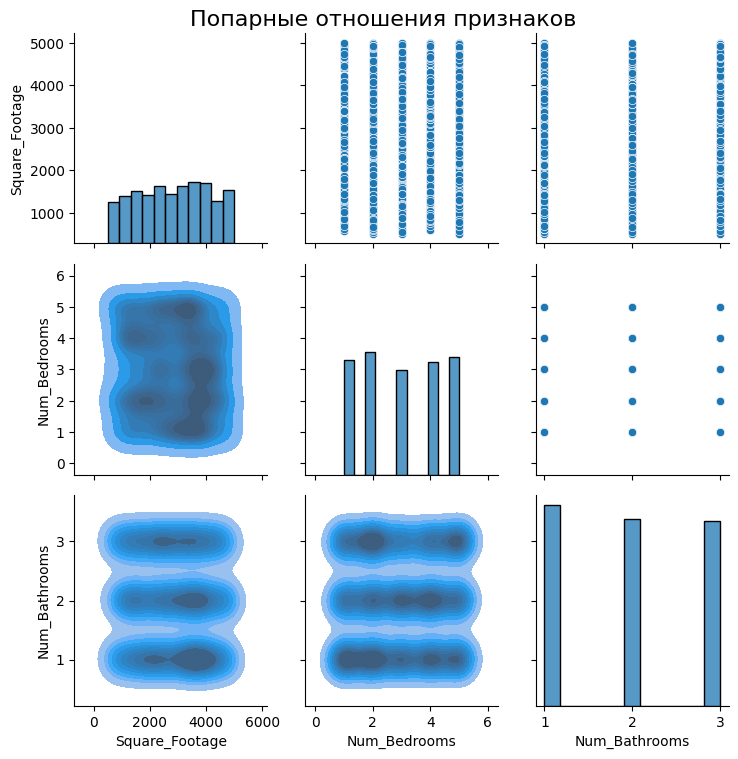

In [ ]:
f = plt.figure(figsize=(8,8))
g = sns.PairGrid(data=data, x_vars=col, y_vars=col)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_upper(sns.scatterplot)
g.fig.suptitle('Попарные отношения признаков', fontsize=16, y=1.005)
plt.show()


## **8. Постройте матрицу корреляции признаков на тепловой карте. по ней определите, есть ли сильно скоррелированные признаки.**



Матрица корреляции:


In [42]:
corr = data[col].corr()
corr

,Square_Footage,Num_Bedrooms,Num_Bathrooms
Square_Footage,1.000000,-0.043564,-0.031584
Num_Bedrooms,-0.043564,1.000000,0.022848
Num_Bathrooms,-0.031584,0.022848,1.000000


Построим её на тепловой карте:

Text(0.5, 1.0, 'Тепловая карьа матрицы корреляции')

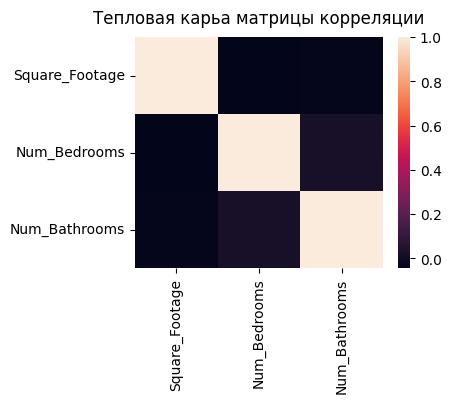

In [43]:
f = plt.figure(figsize=(4, 3))
sns.heatmap(corr)
plt.title('Тепловая карьа матрицы корреляции', fontsize=12, pad=10)

Сделаем её более наглядной, задав значения параметров:

Text(0.5, 1.0, 'Тепловая карта матрицы корреляции')

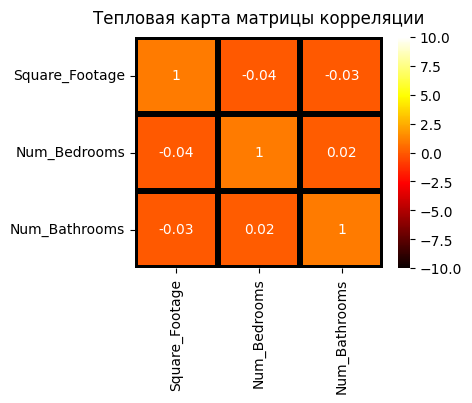

In [46]:
f = plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='hot', vmin=-10, vmax=10, center=0, linewidths=4, linecolor='black', cbar=True)
plt.title('Тепловая карта матрицы корреляции', fontsize=12, pad=10)

Все признаки скоррелированы слабо.

***Построение 3D-граффиков***


## **9. Построить поверхность z= x^2 + y^2 на области [—10: 10] × [—12; 8].**


Запрограммируем функцию:

In [47]:
def z(x, y):
  return x**2 + y**2

Зададим квадратную область на плоскости [-10; 10] × [−12; 8] сеткой точек 100 × 100. Для построения сетки используем метод meshgrid библиотеки numpy.

In [53]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-12,8,N)
x_grid, y_grid = np.meshgrid(x, y)

Найдем значения функции в точке сетки:

In [55]:
z_grid = z(x_grid, y_grid)

Построим поверхность по найденным точкам:

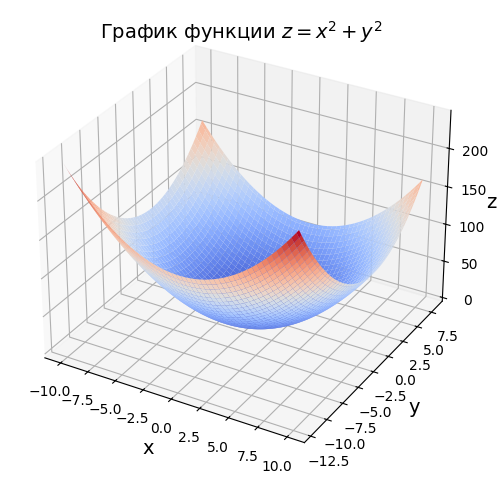

In [57]:
f = plt.figure(figsize = [8, 6])
ax = f.add_subplot(projection='3d') # Построение трехмерной системы координат

ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm') # Построение поверхности

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y=1)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad=-1)
plt.show()

Повернем график:

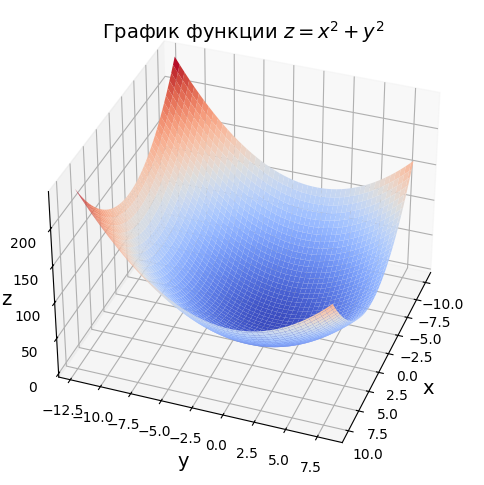

In [60]:
f = plt.figure(figsize=[8, 6])
ax = f.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.view_init(elev=35, azim=20) # Поворот графика

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y=1)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad= -1)

plt.show()


## **10. Построить линии уровня поверхности z = x^2 + у^2 на плоскости и в пространстве.**

Для построения линий уровня используем метод contour библиотеки matplotlib

Линии уровня на плоскости:

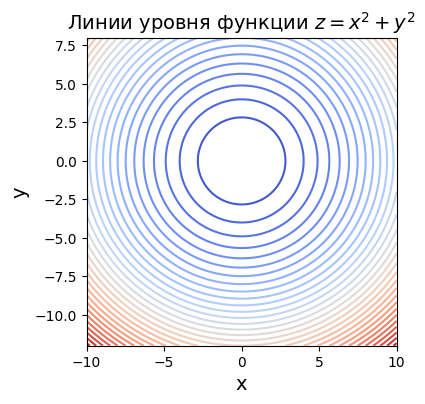

In [63]:
f = plt.figure(figsize=[4, 4])
ax = f.subplots()

ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm', levels=30) # Построение линий уровня

ax.set_title('Линии уровня функции $z = x^2 + y^2$', fontsize=14, y=1)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
plt.show()

Линии уровня в пространстве:

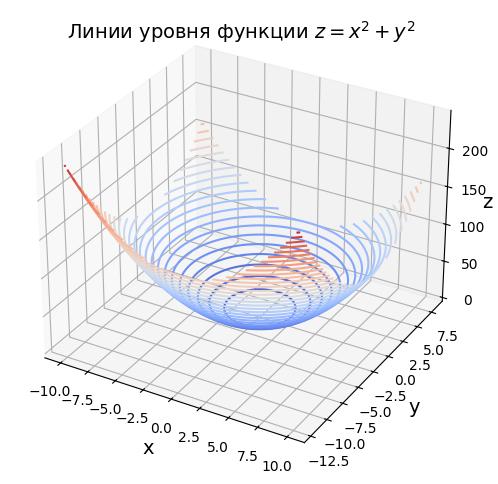

In [64]:
fig = plt.figure(figsize = [8, 6])
ax = fig.add_subplot(projection='3d')
ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm', levels=30)
ax.set_title('Линии уровня функции $z = x^2 + y^2$', fontsize=14, y = 1)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -3)
plt.show()
